In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_ASL_path = "E:\ELEC872_project\\archive\output\dataset"

In [3]:
labels = os.listdir(train_ASL_path)

labels = ["a","b","c","d","e","f","g","h","i","j","k","l","m","n","o","p","q","r","s","t","u","v","w","x","y","z"]

all_img = []
all_label = []

for label in labels:
    print(label)
    imgs = [f for f in os.listdir(train_ASL_path + '\\' + label + '\\lit\\') if f.endswith('.png')]
    print(len(imgs))
    for img in imgs:
        data = cv2.imread(train_ASL_path + '\\' + label + '\\lit\\' + img)
        #print(data.shape)
        #cv2.imshow('image', data)
        data = cv2.resize(data, (128,128))
        all_img.append(data)
        all_label.append(label)
    print("size of this label:", len(all_img))

a
1001
size of this label: 1001
b
1001
size of this label: 2002
c
1001
size of this label: 3003
d
1001
size of this label: 4004
e
1001
size of this label: 5005
f
1001
size of this label: 6006
g
1001
size of this label: 7007
h
1001
size of this label: 8008
i
1001
size of this label: 9009
j
1001
size of this label: 10010
k
1001
size of this label: 11011
l
1001
size of this label: 12012
m
1001
size of this label: 13013
n
1001
size of this label: 14014
o
1001
size of this label: 15015
p
1001
size of this label: 16016
q
1001
size of this label: 17017
r
1001
size of this label: 18018
s
1001
size of this label: 19019
t
1001
size of this label: 20020
u
1001
size of this label: 21021
v
1001
size of this label: 22022
w
1001
size of this label: 23023
x
1001
size of this label: 24024
y
1001
size of this label: 25025
z
1001
size of this label: 26026


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
def OneHotEncoding(labels):
    # convert array
    labels = np.array(labels)
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(labels)
    print(integer_encoded)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    return onehot_encoded

y = OneHotEncoding(all_label)

[ 0  0  0 ... 25 25 25]


In [5]:
all_img = np.array(all_img)
all_img = all_img.astype('float32')/255.0

In [6]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(all_img,np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)

In [7]:
#reshape train set and val set
#x_tr = x_tr.reshape([len(x_tr), 480, 640, 1])
#x_val = x_val.reshape([len(x_val), 480, 640, 1])
print(len(x_val))

5206


In [8]:
import keras
from keras.layers import Dense, Dropout, Flatten, Conv2D, Input, MaxPooling2D, BatchNormalization
from keras.models import Model
from keras.models import Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras import backend as K
K.clear_session()

#inputs = Input(shape=(480, 640, 1))

#First Conv2D layer
#conv = Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu', strides=1)(inputs)
#conv = MaxPooling2D(pool_size=(3, 3))(conv)
#conv = Dropout(0.3)(conv)

#Second Conv2D layer
#conv = Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu', strides=1)(conv)
#conv = MaxPooling2D(pool_size=(3, 3))(conv)
#conv = Dropout(0.3)(conv)

#Third Conv2D layer
#conv = Conv2D(256, kernel_size=(3, 3), padding='valid', activation='relu', strides=1)(conv)
#conv = MaxPooling2D(pool_size=(3, 3))(conv)
#conv = Dropout(0.3)(conv)

#Fourth Conv2D layer
#conv = Conv2D(512, kernel_size=(3, 3), padding='same', activation='relu', strides=1)(conv)
#conv = MaxPooling2D(pool_size=(3, 3))(conv)
#conv = Dropout(0.3)(conv)

#Fourth Conv2D layer
#conv = Conv2D(1024, kernel_size=(3, 3), padding='same', activation='relu', strides=1)(conv)
#conv = MaxPooling2D(pool_size=(3, 3))(conv)
#conv = Dropout(0.3)(conv)

#Flatten layer
#conv = Flatten()(conv)

#Dense Layer 1
#conv = Dense(256, activation='tanh')(conv)
#conv = Dropout(0.3)(conv)

#Dense Layer 2
#conv = Dense(128, activation='tanh')(conv)
#conv = Dropout(0.3)(conv)

#outputs = Dense(len(labels), activation='softmax')(conv)

#model = Model(inputs, outputs)
#model.summary()

In [9]:
#model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics='accuracy')

In [39]:
def create_model():
    
    model = Sequential()
    
    model.add(Conv2D(16, kernel_size = [3,3], padding = 'same', activation = 'relu', input_shape = (128,128,3)))
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = [3,3]))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(64, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = [3,3]))
    model.add(Dropout(0.2))
    
    model.add(Conv2D(128, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(Conv2D(256, kernel_size = [3,3], padding = 'same', activation = 'relu'))
    model.add(MaxPooling2D(pool_size = [3,3]))
    #model.add(Dropout(0.4))
    
    model.add(BatchNormalization())
    
    model.add(Flatten())
    #model.add(Dropout(0.9))
    model.add(Dense(512, activation = 'relu', kernel_regularizer = regularizers.l2(0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(26, activation = 'softmax'))
    
    model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])
    
    print("MODEL CREATED")
    model.summary()
    
    return model

#def fit_model():
    #model_hist = model.fit(X_train, Y_train, batch_size = 64, epochs = 5, validation_split = 0.1)
    #return model_hist 

In [40]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.00001) 
mc = ModelCheckpoint('872_best_model_CNN.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [41]:
print(len(labels))

26


In [42]:
model = create_model()

MODEL CREATED
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 42, 42, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 42, 42, 32)        9248      
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 42, 42, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 

In [43]:
#Train and Test The Model

history=model.fit(x_tr, y_tr ,epochs=30, callbacks=[es,mc], batch_size=64, validation_data=(x_val,y_val))

Epoch 1/30
326/326 [==============================] - 11s 31ms/step - loss: 2.6142 - accuracy: 0.3260 - val_loss: 1.6403 - val_accuracy: 0.6957

Epoch 00001: val_accuracy improved from -inf to 0.69574, saving model to 872_best_model_CNN.hdf5
Epoch 2/30
326/326 [==============================] - 10s 30ms/step - loss: 0.5256 - accuracy: 0.8745 - val_loss: 0.4161 - val_accuracy: 0.9045

Epoch 00002: val_accuracy improved from 0.69574 to 0.90453, saving model to 872_best_model_CNN.hdf5
Epoch 3/30
326/326 [==============================] - 10s 30ms/step - loss: 0.3563 - accuracy: 0.9177 - val_loss: 0.3928 - val_accuracy: 0.9047

Epoch 00003: val_accuracy improved from 0.90453 to 0.90473, saving model to 872_best_model_CNN.hdf5
Epoch 4/30
326/326 [==============================] - 10s 30ms/step - loss: 0.2962 - accuracy: 0.9346 - val_loss: 0.2699 - val_accuracy: 0.9433

Epoch 00004: val_accuracy improved from 0.90473 to 0.94333, saving model to 872_best_model_CNN.hdf5
Epoch 5/30
326/326 [===

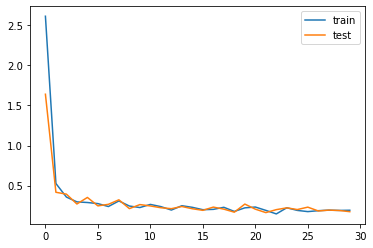

In [44]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend()
pyplot.show()

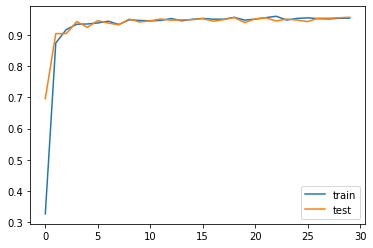

In [45]:
pyplot.plot(history.history['accuracy'], label='train') 
pyplot.plot(history.history['val_accuracy'], label='test') 
pyplot.legend()
pyplot.show()